**<span style="color:red">Namn och CID p√• gruppmedlemmar: </span>**

Blend Ahmed Omar (blend), Ebbe Ledin (ebbel), Albin √ñstling (ostlinga)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from scipy import special # Importera funktion f√∂r att kunna generera bessel funktioner

In [6]:
# Funktioner f√∂r att l√∂sa HUPP:en

def fft2c(x):
    '''
    2D Fourier transform
    
    Denna √§r perfekt som den √§r. Bara att anv√§nda!
    '''
    return np.fft.fftshift(np.fft.fft2(np.fft.fftshift(x)))

def ifft2c(x):
    '''
    2D inverse Fourier transform
    
    Denna √§r perfekt som den √§r. Bara att anv√§nda!
    '''
    return np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(x)))

def rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays):
    '''
    Plottar str√•lar f√∂r HiRISE linsen med olika faskorrektioner
    '''
    
    # Definera start v√§rden f√∂r str√•larna
    y_rays        = np.linspace(-D_lins/2, D_lins/2, number_of_rays + 1)
    dfidy         = 2*c_2*y_rays + 4*c_4*y_rays**3
    k_y           = dfidy
    
    # Vinkel som str√•larna propargerar med
    propvinkel    = np.arcsin(k_y/k0)
    
    # L√§ngd som str√•larna propagerar
    L_rays        = 1.1*f_lins
    
    # Slut y-v√§rde f√∂r str√•larna
    y_rays_prop   = y_rays + L_rays*np.tan(propvinkel)
    
    
    # Arrayer f√∂r att plottar str√•larna
    x_plot_rays        = np.zeros([2, len(y_rays)])
    x_plot_rays[1, :]  = L_rays
    y_plot_rays        = np.zeros([2, len(y_rays)])
    y_plot_rays[0, :]  = y_rays
    y_plot_rays[1, :]  = y_rays_prop
    
    # Konvertera enheter till cm f√∂r plot
    cm = 1e-2
    y_plot_rays_cm = y_plot_rays/cm
    D_lins_cm      = D_lins/cm
    
    # Plotta en linje f√∂r fokalplanet f√∂r linsen
    x_f_lins = np.array([f_lins, f_lins])
    y_D_lins = np.array([-D_lins_cm/2, D_lins_cm/2])  
    
    
    # Plotta bild med str√•lar och fokalplanen f√∂r linsen
    plt.figure()
    plt.plot(x_plot_rays, y_plot_rays_cm, 'r', linewidth=0.5)
    plt.plot(x_f_lins, y_D_lins, 'black')
    
    plt.xlabel(r'z [m]')
    plt.ylabel(r'y [cm]')
    plt.title(r'Str√•lg√•ng i HiRISE med korrektion $c_4=$' + str(c_4) + r' [m$^{-4}$]')
    
    # Plotta inzoomad bild med str√•lar och fokalplanen f√∂r linsen
    y_zoom_min = -0.04e-1
    y_zoom_max = np.abs(y_zoom_min)
    z_zoom_min = 3-5e-2
    z_zoom_max = 3+5e-2
    
    y_zoom_min_cm = y_zoom_min/cm
    y_zoom_max_cm = y_zoom_max/cm
    
    plt.figure()
    plt.plot(x_plot_rays, y_plot_rays_cm, 'r', linewidth=0.5)
    plt.plot(x_f_lins, y_D_lins, 'black')
    
    plt.ylim([y_zoom_min_cm, y_zoom_max_cm])
    plt.xlim([z_zoom_min, z_zoom_max])
    
    plt.xlabel(r'z [m]')
    plt.ylabel(r'y [cm]')
    plt.title(r'Inzoomning n√§ra fokus med korrektion $c_4=$' + str(round(c_4, 2)) + r' [m$^{-4}$]')
    
def PSF_radiell(PSF_radiell_ickeparaxiell, N, samplavst_2D):
    '''
    Samplar om din PSF l√§ngst en axel till en 2D PSF.
    F√∂r att g√∂ra detta s√• interpolerar PSF:en som du har ber√§knat l√§ngst 
    en axel. Sen tar vi fram det radiella avt√•ndet till alla punkter 
    i uv-planet och anv√§nder det f√∂r att kalla p√• interpoleringen av din PSF.
    '''
    # Generera vektorer f√∂r 2D sampling
    u_range = N_2D*samplavst_2D/2
    u_2D = np.arange(-u_range, u_range, samplavst_2D)
    v_2D = u_2D
    U_2D, V_2D = np.meshgrid(u_2D, v_2D)

    # Radiellt avst√•nd till punkter i uv-planet
    R_UV = np.sqrt(U_2D**2 + V_2D**2)                   

    # Sampla om den radiella intensitets funktionen till 2D
    PSF_radiell_2D = np.interp(R_UV, u, PSF_radiell_ickeparaxiell)
    
    return PSF_radiell_2D, u_2D, v_2D

# Uppgift 1 - Ber√§kning av PSF


#### Komplettera den n√§stan f√§rdiga givna funktionen PSF (endast tv√• rader beh√∂ver kompletteras) s√• att rutinen ber√§knar PSFen l√§ngs u-axeln f√∂r avbildningen i HiRISE!


In [7]:
def PSF(u, L, k, X, Y, T_lins):
    '''
    Ber√§kna PSF:en i plan tv√• f√∂r alla punkter i vektorn u
    '''
    # Initiera vektor f√∂r att spara PSF:en
    E_PSF_radiell_ickeparaxiell = np.zeros(len(u), dtype=complex)
    
    
    # Iterera genom alla ber√§kningspunkterna l√§ngs u-axeln
    for i in range(len(u)):
        if i % 10 == 0:
            print(f'Calculating PSF for point: {i} of {len(u)}')
            
        u_current                      = u[i]      # u-koordinat f√∂r nuvarande ber√§kningspunkt                 
        r                              = np.sqrt(L**2 + (X-u_current)**2 + (Y)**2)       # Matris med avst√•nd fr√•n alla sampelpunkter i Plan 1 till aktuell ber√§kningspunkt
        E_PSF_radiell_ickeparaxiell[i] = np.sum(np.sum(T_lins* np.exp(1j*k*r) / r))       # F√§ltet i ber√§kningspunkten, ber√§knat med HFM-integralen
        
    return E_PSF_radiell_ickeparaxiell

#### Koden plottar ocks√• vad den paraxiella approximationen skulle ge f√∂r resultat.

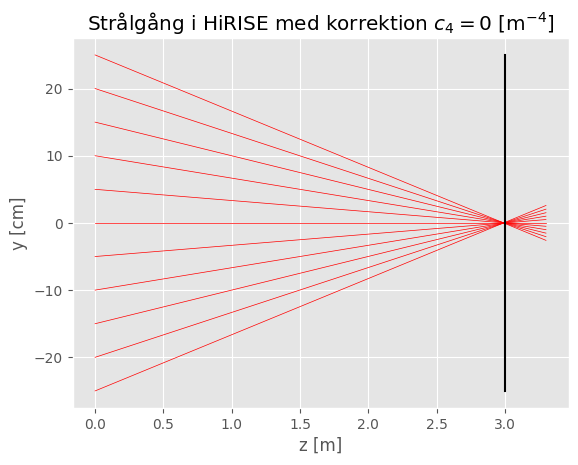

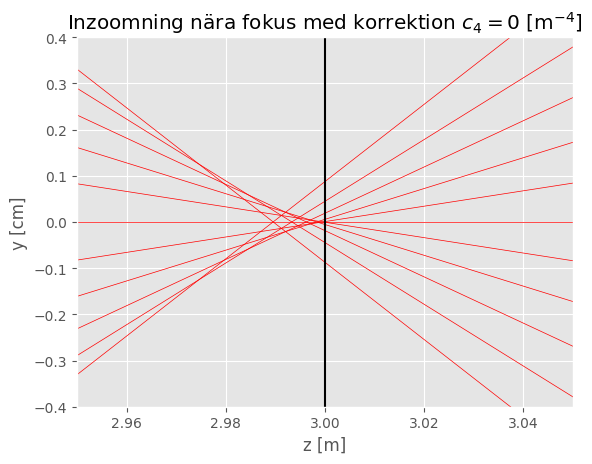

In [8]:
#%% Fixa faskorrektionen f√∂r HiRISE speglen %##
### Definerar variabler ###
D_lins         = 0.5              # Linsens diameter   [m]
L              = 3                # Propagations l√§ngd [m]
f_lins         = L                # Linsens fokall√§ngd [m]
lam0           = 600e-9           # V√•gl√§ngd           [m]
k0             = 2*np.pi/lam0     # V√•gvektor          [1/m]

number_of_rays = 10               # Antal str√•lar att plotta


c_2            = -k0/(2*f_lins)   # Linsens fasmodulering
c_4            = 0                # Faskorrektion (F√∂r uppgift 1 ska vara c_4 = 0)

### Plottar st√•lg√•ng f√∂r linser ###
rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays)

#### **J√§mf√∂r det paraxiella resultatet med det optiska systemets verkliga PSF ‚Äì √§r du n√∂jd med den verkliga PSFen?**

Calculating PSF for point: 0 of 121
Calculating PSF for point: 10 of 121
Calculating PSF for point: 20 of 121
Calculating PSF for point: 30 of 121
Calculating PSF for point: 40 of 121
Calculating PSF for point: 50 of 121
Calculating PSF for point: 60 of 121
Calculating PSF for point: 70 of 121
Calculating PSF for point: 80 of 121
Calculating PSF for point: 90 of 121
Calculating PSF for point: 100 of 121
Calculating PSF for point: 110 of 121
Calculating PSF for point: 120 of 121


Text(0.5, 1.0, '$I_{PSF,norm}$, $c_4$ = 0')

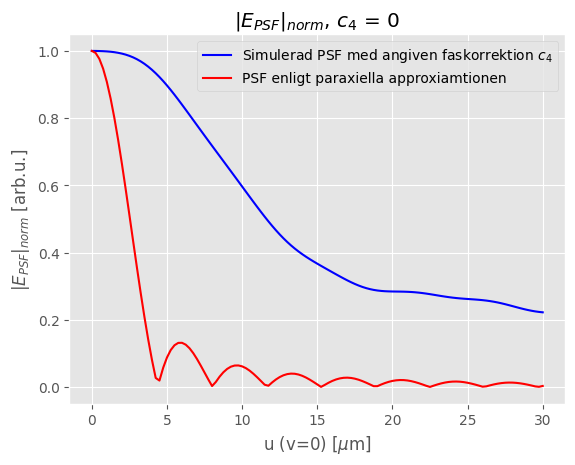

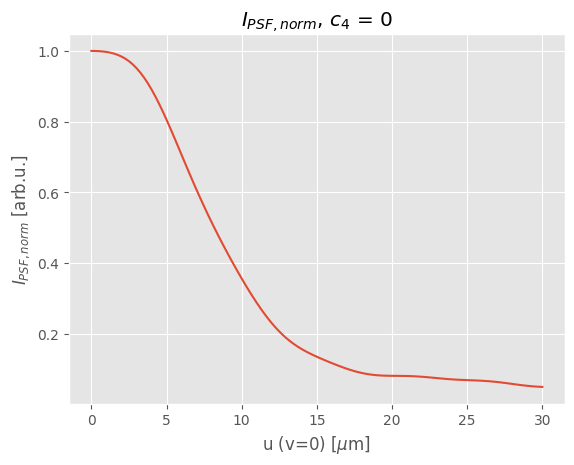

In [9]:
N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavst√•nd

### Generera vektorer och matriser med samplingspunkter ###
x_range = (N/2)*a
x = np.arange(-x_range, x_range, a)
y = x
X, Y = np.meshgrid(x,y) 

R = np.sqrt(X**2 + Y**2)                    # Radiellt avst√•nd till samplingspunkter

fi_lins = -k0*R**2/(2*f_lins) + c_4*R**4    # Definiera fasmoduleringsfunktion f√∂r linsen
T_lins  = np.exp(1j*fi_lins)*(R < D_lins/2) # TOK f√∂r linsen

### Generera punkter l√§ngs u-axeln i plan 2 d√§r PSF:en ska ber√§knas ###
steg_i_u_led = 0.25e-6                            # Samplingsl√§ngd l√§ngs u-axeln
u_max        = 30e-6                              # Maxl√§ngd f√∂r u-axeln
u            = np.arange(0, u_max, steg_i_u_led)  # Positioner d√§r PSF:en ber√§knas 

### Ber√§kna PSF:en l√§ngs u-axeln ###
# Komplettera funktionen PSF f√∂r att det ska fungera!
E_PSF_radiell_ickeparaxiell = PSF(u, L, k0, X, Y, T_lins)

# Teoretisk PSF. Ska vara mycket lik den ber√§knande PSF:en med r√§tt faskorrektion c_4
E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod = special.jv(1, k0*D_lins/(2*L)*(u+steg_i_u_led*1e-5))/(u+steg_i_u_led*1e-5)


### Plotta PSF:en ###
# Skala om v√§rden f√∂r att plotta
um = 1e-6
u_um = u/um

# Normalisering av PSF
E_PSF_norm = np.abs(E_PSF_radiell_ickeparaxiell)/np.abs(E_PSF_radiell_ickeparaxiell[0])
E_PSF_teori_norm =  np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod)/np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod[0])


plt.figure()
plt.plot(u_um, E_PSF_norm, color= "blue", label='Simulerad PSF med angiven faskorrektion $c_4$')
plt.plot(u_um, E_PSF_teori_norm, 'r', label='PSF enligt paraxiella approxiamtionen')

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$|E_{PSF}|_{norm}$ [arb.u.]')
plt.title(r'$|E_{PSF}|_{norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.legend()
    

### Ber√§kna och plotta intensitet av PSF:en ###
PSF_radiell_ickeparaxiell = np.abs(E_PSF_radiell_ickeparaxiell)**2
PSF_radiell_ickeparaxiell_norm = PSF_radiell_ickeparaxiell/PSF_radiell_ickeparaxiell[0]

plt.figure()
plt.plot(u_um, PSF_radiell_ickeparaxiell_norm)

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$I_{PSF,norm}$ [arb.u.]')
plt.title(r'$I_{PSF,norm}$, $c_4$ = ' + str(round(c_4, 2)))

*SVARA H√ÑR*
J√§mf√∂relse av det paraxiella resultatet med det optiska systemets verkliga PSF ger att vi inte √§r n√∂jda, d√• de skiljer sig markant.

# Uppgift 2 - Utf√∂r spegelkorrektion!


Calculating PSF for point: 0 of 121
Calculating PSF for point: 10 of 121
Calculating PSF for point: 20 of 121
Calculating PSF for point: 30 of 121
Calculating PSF for point: 40 of 121
Calculating PSF for point: 50 of 121
Calculating PSF for point: 60 of 121
Calculating PSF for point: 70 of 121
Calculating PSF for point: 80 of 121
Calculating PSF for point: 90 of 121
Calculating PSF for point: 100 of 121
Calculating PSF for point: 110 of 121
Calculating PSF for point: 120 of 121


Text(0.5, 1.0, '$I_{PSF,norm}$, $c_4$ = 48500')

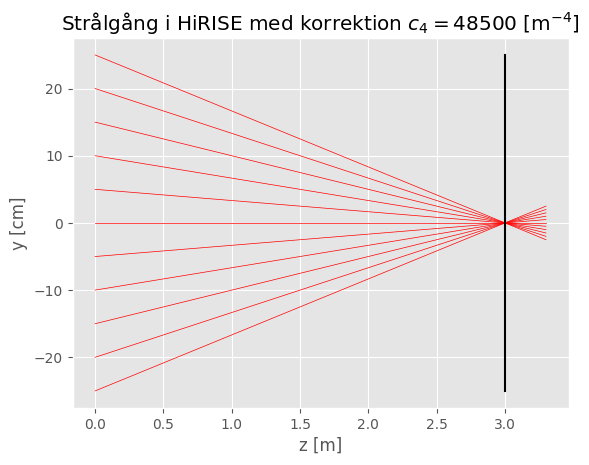

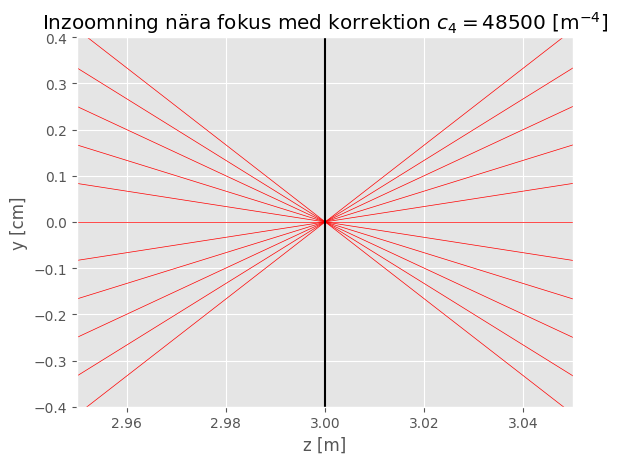

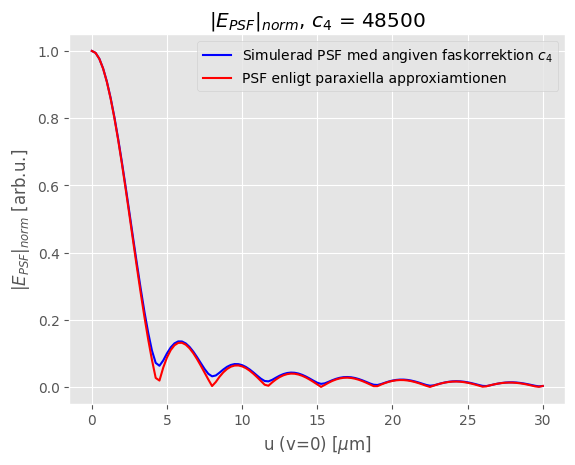

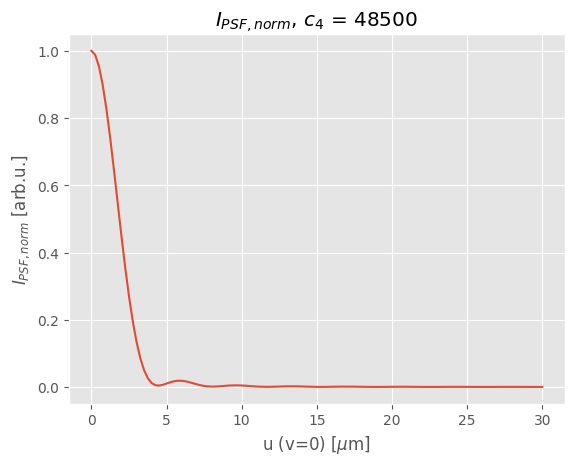

In [10]:
# kod

#%% Fixa faskorrektionen f√∂r HiRISE speglen %##
### Definerar variabler ###
D_lins         = 0.5              # Linsens diameter   [m]
L              = 3                # Propagations l√§ngd [m]
f_lins         = L                # Linsens fokall√§ngd [m]
lam0           = 600e-9           # V√•gl√§ngd           [m]
k0             = 2*np.pi/lam0     # V√•gvektor          [1/m]

number_of_rays = 10               # Antal str√•lar att plotta


c_2            = -k0/(2*f_lins)   # Linsens fasmodulering
c_4            = 48500 # Faskorrektion (F√∂r uppgift 1 ska vara c_4 = 0)

### Plottar st√•lg√•ng f√∂r linser ###
rays_HiRISE(c_2, c_4, k0, D_lins, number_of_rays)

N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavst√•nd

### Generera vektorer och matriser med samplingspunkter ###
x_range = (N/2)*a
x = np.arange(-x_range, x_range, a)
y = x
X, Y = np.meshgrid(x,y) 

R = np.sqrt(X**2 + Y**2)                    # Radiellt avst√•nd till samplingspunkter

fi_lins = -k0*R**2/(2*f_lins) + c_4*R**4    # Definiera fasmoduleringsfunktion f√∂r linsen
T_lins  = np.exp(1j*fi_lins)*(R < D_lins/2) # TOK f√∂r linsen

### Generera punkter l√§ngs u-axeln i plan 2 d√§r PSF:en ska ber√§knas ###
steg_i_u_led = 0.25e-6                            # Samplingsl√§ngd l√§ngs u-axeln
u_max        = 30e-6                              # Maxl√§ngd f√∂r u-axeln
u            = np.arange(0, u_max, steg_i_u_led)  # Positioner d√§r PSF:en ber√§knas 

### Ber√§kna PSF:en l√§ngs u-axeln ###
# Komplettera funktionen PSF f√∂r att det ska fungera!
E_PSF_radiell_ickeparaxiell = PSF(u, L, k0, X, Y, T_lins)

# Teoretisk PSF. Ska vara mycket lik den ber√§knande PSF:en med r√§tt faskorrektion c_4
E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod = special.jv(1, k0*D_lins/(2*L)*(u+steg_i_u_led*1e-5))/(u+steg_i_u_led*1e-5)


### Plotta PSF:en ###
# Skala om v√§rden f√∂r att plotta
um = 1e-6
u_um = u/um

# Normalisering av PSF
E_PSF_norm = np.abs(E_PSF_radiell_ickeparaxiell)/np.abs(E_PSF_radiell_ickeparaxiell[0])
E_PSF_teori_norm =  np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod)/np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod[0])


plt.figure()
plt.plot(u_um, E_PSF_norm, color= "blue", label='Simulerad PSF med angiven faskorrektion $c_4$')
plt.plot(u_um, E_PSF_teori_norm, 'r', label='PSF enligt paraxiella approxiamtionen')

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$|E_{PSF}|_{norm}$ [arb.u.]')
plt.title(r'$|E_{PSF}|_{norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.legend()
    

### Ber√§kna och plotta intensitet av PSF:en ###
PSF_radiell_ickeparaxiell = np.abs(E_PSF_radiell_ickeparaxiell)**2
PSF_radiell_ickeparaxiell_norm = PSF_radiell_ickeparaxiell/PSF_radiell_ickeparaxiell[0]

plt.figure()
plt.plot(u_um, PSF_radiell_ickeparaxiell_norm)

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$I_{PSF,norm}$ [arb.u.]')
plt.title(r'$I_{PSF,norm}$, $c_4$ = ' + str(round(c_4, 2)))

# Uppgift 3 - Hur stor √§r korrektionen i mm?

#### **Hur mycket √§ndras det fysiska djupet hos HiRISE-spegeln genom din faskorrektion?**

[0.00000000e+00 2.31570442e-11 3.70512708e-10 1.87572058e-09
 5.92820332e-09 1.44731526e-08 3.00115293e-08 5.56000632e-08
 9.48512531e-08 1.51933367e-07 2.31570442e-07 3.39042284e-07
 4.80184469e-07 6.61388340e-07 8.89601011e-07 1.17232536e-06
 1.51762005e-06 1.93409949e-06 2.43093387e-06 3.01784916e-06
 3.70512708e-06 4.50360512e-06 5.42467655e-06 6.48029041e-06
 7.68295150e-06 9.04572040e-06]


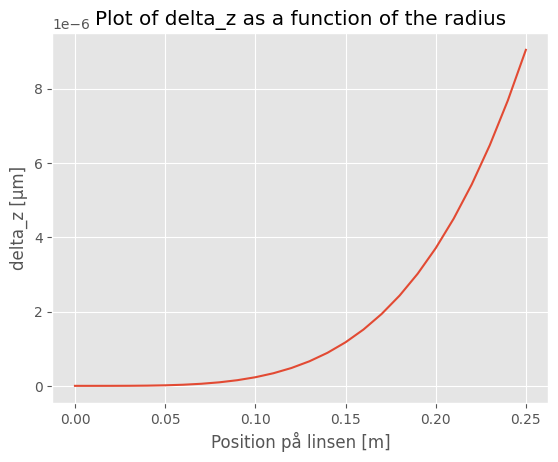

In [ ]:
# KOD
x_values = np.arange(0, 0.251, 0.01)
delta_phi=c_4*x_values**4
delta_z=delta_phi /(2*k0)
print(delta_z)


plt.plot(x_values, delta_phi/(2*k0))
plt.title("Plot of delta_z as a function of the radius")
plt.xlabel("Position p√• linsen [m]")
plt.ylabel("delta_z [¬µm]")
plt.grid(True)
plt.show()


Man ser p√• grafen att skillnaden vid mitten av spegeln √§r 0 och √∂kar ju l√§ngre ut man kommer. Vid kanten √§r den ca. 9 mikrometer

# Uppgift 4 - H√•l i bilden?

#### Modifiera er anrop till funktionen PSF, genom att komplettera linsens transmissionsfunktion $T_{lins}$ s√• att den √§ven inkluderar en central blockering med diametern $ùê∑_{block} = 15$ cm. Anv√§nd den optimerade fasmoduleringen f√∂r spegeln som du best√§mde i deluppgift 2. Ber√§kna den PSF som erh√•lls, och bed√∂m med din magk√§nsla huruvida bilden av Marsytan kommer att bli mycket s√§mre, j√§mf√∂rt med fallet utan blockering! 

Calculating PSF for point: 0 of 121
Calculating PSF for point: 10 of 121
Calculating PSF for point: 20 of 121
Calculating PSF for point: 30 of 121
Calculating PSF for point: 40 of 121
Calculating PSF for point: 50 of 121
Calculating PSF for point: 60 of 121
Calculating PSF for point: 70 of 121
Calculating PSF for point: 80 of 121
Calculating PSF for point: 90 of 121
Calculating PSF for point: 100 of 121
Calculating PSF for point: 110 of 121
Calculating PSF for point: 120 of 121


Text(0.5, 1.0, '$I_{PSF,norm}$, $c_4$ = 48500')

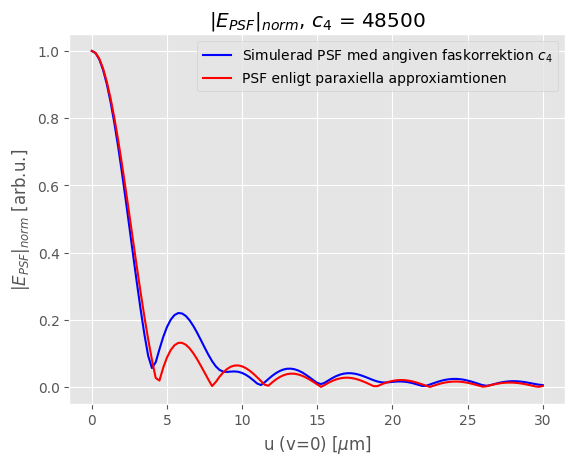

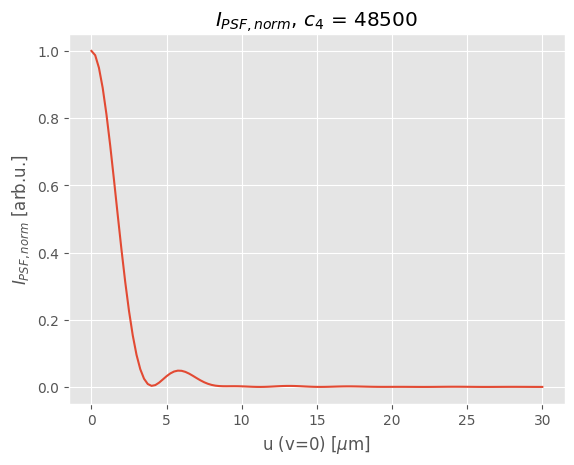

In [12]:

c_4            = 48500 # Faskorrektion (F√∂r uppgift 1 ska vara c_4 = 0)

N = 2**10                                   # Samplingstorlek
a = D_lins/N                                # Sampleavst√•nd

### Generera vektorer och matriser med samplingspunkter ###
x_range = (N/2)*a
x = np.arange(-x_range, x_range, a)
y = x
X, Y = np.meshgrid(x,y) 

R = np.sqrt(X**2 + Y**2)                    # Radiellt avst√•nd till samplingspunkter

fi_lins = -k0*R**2/(2*f_lins) + c_4*R**4    # Definiera fasmoduleringsfunktion f√∂r linsen
T_lins2  = np.exp(1j*fi_lins)*(R < D_lins/2)*(R > 15e-2/2) # TOK f√∂r linsen

### Generera punkter l√§ngs u-axeln i plan 2 d√§r PSF:en ska ber√§knas ###
steg_i_u_led = 0.25e-6                            # Samplingsl√§ngd l√§ngs u-axeln
u_max        = 30e-6                              # Maxl√§ngd f√∂r u-axeln
u            = np.arange(0, u_max, steg_i_u_led)  # Positioner d√§r PSF:en ber√§knas 

### Ber√§kna PSF:en l√§ngs u-axeln ###
# Komplettera funktionen PSF f√∂r att det ska fungera!
E_PSF_radiell_ickeparaxiell = PSF(u, L, k0, X, Y, T_lins2)

# Teoretisk PSF. Ska vara mycket lik den ber√§knande PSF:en med r√§tt faskorrektion c_4
E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod = special.jv(1, k0*D_lins/(2*L)*(u+steg_i_u_led*1e-5))/(u+steg_i_u_led*1e-5)


### Plotta PSF:en ###
# Skala om v√§rden f√∂r att plotta
um = 1e-6
u_um = u/um

# Normalisering av PSF
E_PSF_norm = np.abs(E_PSF_radiell_ickeparaxiell)/np.abs(E_PSF_radiell_ickeparaxiell[0])
E_PSF_teori_norm =  np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod)/np.abs(E_PSF_radiell_paraxiell_teori_paraxiell_linsfasmod[0])


plt.figure()
plt.plot(u_um, E_PSF_norm, color= "blue", label='Simulerad PSF med angiven faskorrektion $c_4$')
plt.plot(u_um, E_PSF_teori_norm, 'r', label='PSF enligt paraxiella approxiamtionen')

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$|E_{PSF}|_{norm}$ [arb.u.]')
plt.title(r'$|E_{PSF}|_{norm}$, $c_4$ = ' + str(round(c_4, 2)))
plt.legend()
    

### Ber√§kna och plotta intensitet av PSF:en ###
PSF_radiell_ickeparaxiell = np.abs(E_PSF_radiell_ickeparaxiell)**2
PSF_radiell_ickeparaxiell_norm = PSF_radiell_ickeparaxiell/PSF_radiell_ickeparaxiell[0]

plt.figure()
plt.plot(u_um, PSF_radiell_ickeparaxiell_norm)

plt.xlabel(r'u (v=0) [$\mu$m]')
plt.ylabel(r'$I_{PSF,norm}$ [arb.u.]')
plt.title(r'$I_{PSF,norm}$, $c_4$ = ' + str(round(c_4, 2)))


#### **Skapar blockeringen rentav ett m√∂rkt h√•l i bilden, och i s√• fall var i bilden uppst√•r h√•let?**

Det blir inget m√∂rkt h√•l men p√• grund av att en del ljus f√∂rloras kommer sk√§rpan i centrum att bli s√§mre.

# Uppgift 5 - Simulering av bilden av Marsytan i teleskopets detektorplan

#### **<span style="background-color:yellow">G√∂r simuleringen f√∂r tv√• fall:</span>** utan respektive med den centrala cirkul√§ra blockeringen som beskrivs i uppgift 4.

#### **(i)** Bilden av Marsytan, √∂ver omr√•det d√§r Mark r√•kar befinna sig. Den t√§cker ett omr√•de av 400√ó400 meter och har 5000√ó5000 pixlar. Denna bild kommer att anv√§ndas som den ‚Äùperfekta bilden‚Äù p√• teleskopets detektor. **Vad blir samplingsavst√•ndet hos den perfekta bilden i teleskopets detektorplan?**

In [ ]:
N_2D = 5000                                          # Antal samplingspunkter f√∂r 2D
samplavst_2D = 400 / N_2D                                   # Samplingsavst√•nd
print(samplavst_2D)

0.08


#### **(ii)** Du har redan ber√§knat PSFen f√∂r avbildningen, med den korrigerade linsen. Denna PSF ska du anv√§nda f√∂r att simulera hur bilden av Marsytan blir. F√∂r att anv√§nda faltningssatsen m√•ste din radiella PSF samplas om till en tv√•dimensionell funktion i $(ùë¢,ùë£)$-planet, med samma samplings-avst√•nd och matrisstorlek som den perfekta bilden: Anv√§nd den f√§rdiga funktionen PSF_radiell med ditt v√§rde p√• $ùëê_4$ f√∂r den korrigerade linsen f√∂r att skapa en matris som inneh√•ller PSFen i teleskopets detektorplan, med samma samplingsavst√•nd och matrisstorlek som den perfekta bilden. Zooma in centrum av matrisen f√∂r att se att din PSF verkar OK!

(-1e-09, 1e-10)

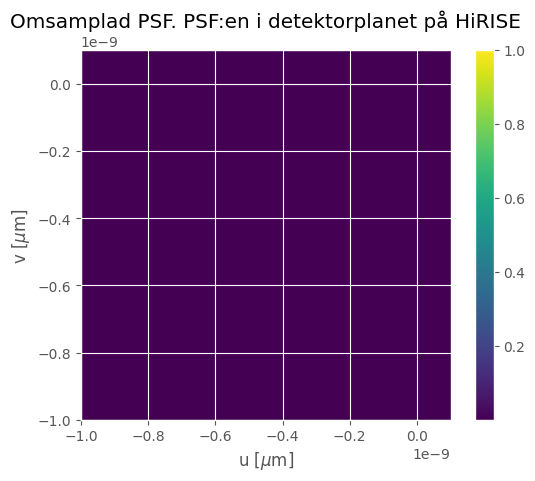

In [32]:
# Skapa radiell 2D PSF
PSF_radiell_2D, u_2D, v_2D = PSF_radiell(PSF_radiell_ickeparaxiell, N, samplavst_2D)

u_2D_um = u_2D*1e6
v_2D_um = v_2D*1e6

# Normalisering f√∂r plottning
PSF_radiell_2D_norm = PSF_radiell_2D/np.max(PSF_radiell_2D)

# Plotta den 2D samplade PSF:en
plt.figure()
image = plt.imshow(PSF_radiell_2D_norm, extent = [u_2D_um.min(), u_2D_um.max(), v_2D_um.min(), v_2D_um.max()])
plt.colorbar(image)

plt.xlabel(r'u [$\mu$m]')
plt.ylabel(r'v [$\mu$m]')
plt.title(r'Omsamplad PSF. PSF:en i detektorplanet p√• HiRISE')

# Zooma in p√• PSF:en
plt.xlim([-0.000000001, 0.0000000001])
plt.ylim([-0.000000001, 0.0000000001])

#### **(iii)** L√§s in den perfekta bilden (f√∂r enkelhets skull har bilden gjorts om till gr√•skala). Zooma in i bilden, ungef√§r som markeras ovan, s√• att du f√∂rvissar dig om att Marks rover, hans fotsp√•r och roverns hjulsp√•r finns med!

(2300.0, 2500.0)

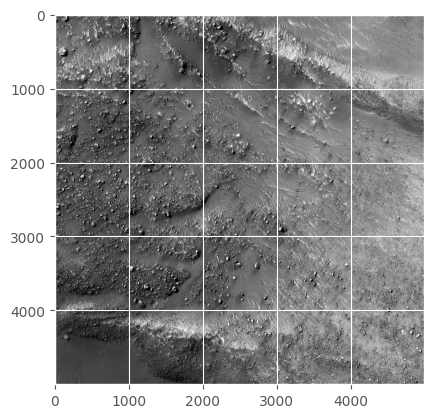

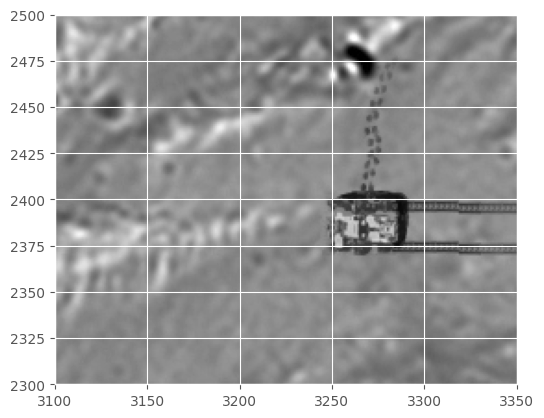

In [33]:
# Inl√§sning av bild. Bilden m√•ste ligga i samma map som ni k√∂r skriptet fr√•n.
perfect_image = plt.imread('highly_resolved_photo_of_Marks_surroundings.jpg')

plt.figure()
plt.imshow(perfect_image, cmap='gray')

plt.figure()
plt.imshow(perfect_image, cmap='gray')

# Anv√§nd xlim och ylim f√∂r att zooma in i bilden och hitta rovern
plt.xlim([3100, 3350])
plt.ylim([2300, 2500])

#### **(iv)** Falta den erh√•llna tv√•dimensionella PSFen med den perfekta bilden f√∂r att f√• den verkliga intensitetsf√∂rdelningen i detektorplanet!

(2300.0, 2500.0)

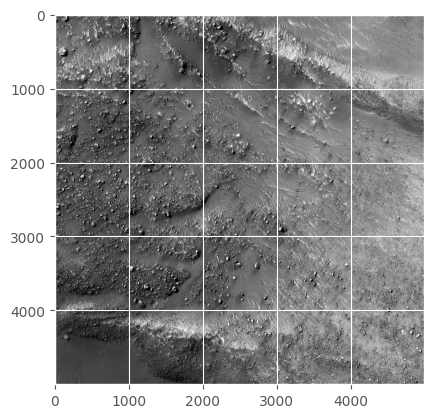

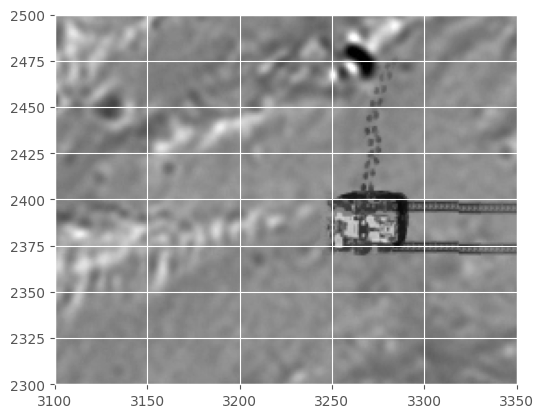

In [37]:
image_PSF = ifft2c(fft2c(perfect_image)*fft2c(PSF_radiell_2D_norm))

plt.figure()
plt.imshow(np.real(image_PSF), cmap='gray')

plt.figure()
plt.imshow(np.real(image_PSF), cmap='gray')

# Anv√§nd xlim och ylim f√∂r att zooma in i bilden och hitta rovern
plt.xlim([3100, 3350])
plt.ylim([2300, 2500])

####  **Vad s√§ger du, √§r The Martian sann?**

*SVARA H√ÑR*

Ja.

In [38]:
#:)